# To Explore Supervised Machine Learning

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading Dataset

In [2]:
df=pd.read_csv("C:\student_scores.csv")

In [3]:
#First 5 records
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()#for print the summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
df['Hours'].isnull().sum()

0

In [9]:
df['Scores'].isnull().sum()

0

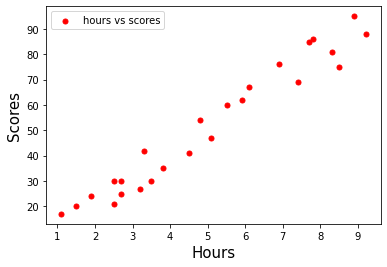

In [10]:
plt.scatter(df.Hours,df.Scores,color="red",s=100,label="hours vs scores",marker=".")
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.legend()
plt.show()

In [11]:
x=df.iloc[:,:-1].values#Independent Variable
y=df.iloc[:,1].values#Dependent Variable

In [12]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Splitting the Dataset into training and testing

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Linear Regression model on training set

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

# Prediction

In [17]:
y_pred=regressor.predict(x_test)

In [18]:
y_pred

array([26.98425546, 87.22707617, 37.02472558, 26.98425546, 12.92759729])

# Actual vs Predicted Score

In [19]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [20]:
df1

,Actual,Predicted
0,21,26.984255
1,75,87.227076
2,30,37.024726
3,30,26.984255
4,17,12.927597


# Visualization

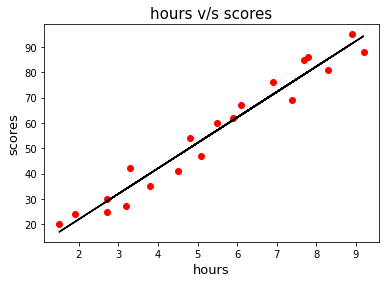

In [21]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,regressor.predict(x_train),color="black")
plt.title("hours v/s scores",fontsize=15)
plt.xlabel("hours",fontsize=13)
plt.ylabel("scores",fontsize=13)
plt.show()

In [22]:
regressor.intercept_

1.88308016409799

# Regression Evaluation matrics

In [23]:
from sklearn import metrics

In [24]:
print('mean absolute error:', metrics.mean_absolute_error(y_test,y_pred))

mean absolute error: 6.464840891451383


In [25]:
print('mean squared error:',metrics.mean_squared_error(y_test,y_pred))

mean squared error: 52.06773070675929


In [26]:
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root mean squared error: 7.215797302222346


In [27]:
regressor.coef_

array([10.04047012])

# Accuracy of the model

In [28]:
metrics.r2_score(y_test,y_pred)

0.8799840247400902

# Predcting the score

In [29]:
study_hour=9.25
Prediction_score=regressor.predict([[study_hour]]).round(2)
print('Predicted score if a student study for 9.25 hours in a day :',Prediction_score)

Predicted score if a student study for 9.25 hours in a day : [94.76]
